In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\credit_risk_dataset main.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [7]:
discrete_df.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [8]:
numerical_df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [9]:
df=df[df["person_age"] < 60]

In [10]:
df.shape

(32496, 12)

In [11]:
df = df[df["person_emp_length"] < 20]   #1040 outliers

In [12]:
df.shape

(31456, 12)

In [13]:
df=df[df["loan_amnt"] < 30000]

In [14]:
df.shape

(31142, 12)

In [15]:
df = df[df["loan_int_rate"] < 20]

In [16]:
df.shape

(28090, 12)

In [17]:
df = df[df["loan_percent_income"] < 0.5]

In [18]:
df.shape

(27818, 12)

In [19]:
df=df[df["cb_person_cred_hist_length"] < 15]

In [20]:
df.shape

(26624, 12)

In [21]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [22]:
duplicate_rows = df[df.duplicated()]



In [23]:
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)


Duplicate Rows except first occurrence:
       person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
29082          27         110000              MORTGAGE               11.0   
29109          27          78000              MORTGAGE                1.0   
29113          32          89000                  RENT                0.0   
32010          42          39996              MORTGAGE                2.0   
32172          49         120000              MORTGAGE               12.0   

           loan_intent loan_grade  

In [24]:
num_duplicates = df.duplicated().sum()
print(f"\nTotal number of duplicate rows: {num_duplicates}")


Total number of duplicate rows: 132


In [25]:
df_no_duplicates = df.drop_duplicates()



In [26]:

print("\nDataset information after removing duplicates:")
print(df_no_duplicates.info())




Dataset information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26492 entries, 1 to 32295
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26492 non-null  int64  
 1   person_income               26492 non-null  int64  
 2   person_home_ownership       26492 non-null  object 
 3   person_emp_length           26492 non-null  float64
 4   loan_intent                 26492 non-null  object 
 5   loan_grade                  26492 non-null  object 
 6   loan_amnt                   26492 non-null  int64  
 7   loan_int_rate               26492 non-null  float64
 8   loan_status                 26492 non-null  int64  
 9   loan_percent_income         26492 non-null  float64
 10  cb_person_default_on_file   26492 non-null  object 
 11  cb_person_cred_hist_length  26492 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memor

In [27]:

df_no_duplicates.to_csv('cleaned_dataset.csv', index=False)

# Univarient Analysis


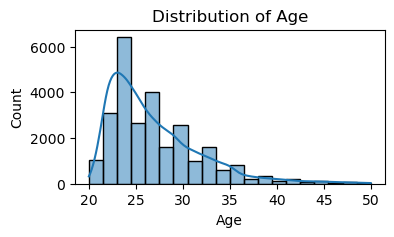

In [28]:
# 1. Histogram for Age
plt.figure(figsize=(4, 2))
sns.histplot(data=df, x='person_age', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

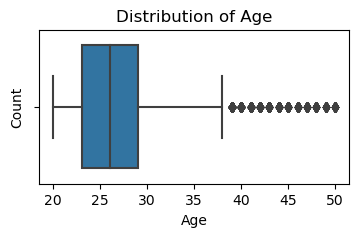

In [29]:
#box plot for Age 
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x='person_age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

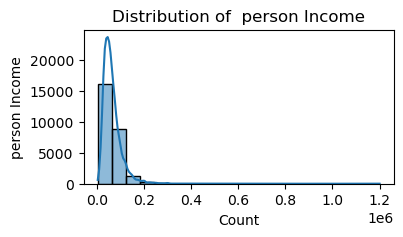

In [30]:
# 2. Histogram for Annual Income
plt.figure(figsize=(4, 2))
sns.histplot(data=df, x='person_income', bins=20, kde=True)
plt.xlabel('Count')
plt.ylabel('person Income')
plt.title('Distribution of  person Income')
plt.show()

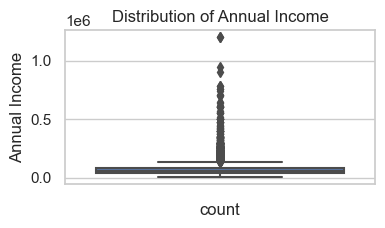

In [40]:
# 2. Box for Annual Income
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, y='person_income')
plt.xlabel('count')
plt.ylabel('Annual Income')
plt.title('Distribution of Annual Income')
plt.show()

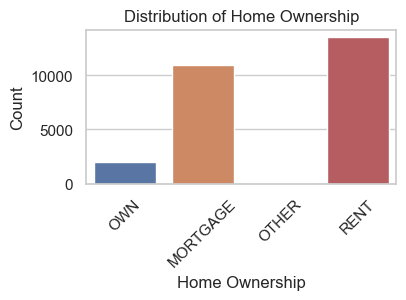

In [41]:
# 3. Countplot for Home Ownership
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='person_home_ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')
plt.xticks(rotation=45)
plt.show()

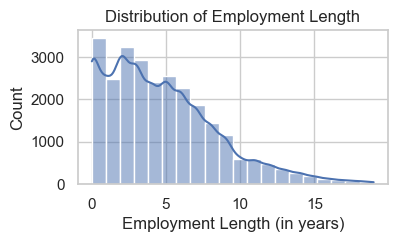

In [42]:
# 4. Histogram for Employment Length
plt.figure(figsize=(4, 2))
sns.histplot(data=df, x='person_emp_length', bins=20, kde=True)
plt.xlabel('Employment Length (in years)')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')
plt.show()

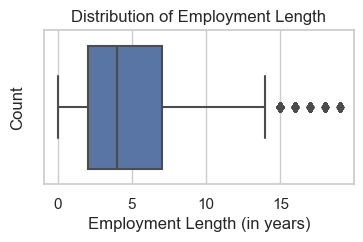

In [43]:
# 4. BoxPlot for Employment Length
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x='person_emp_length')
plt.xlabel('Employment Length (in years)')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')
plt.show()

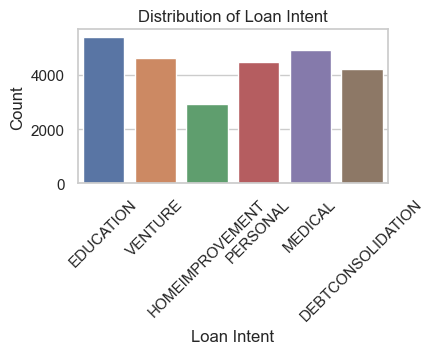

In [44]:
# 5. Countplot for Loan Intent
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='loan_intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.title('Distribution of Loan Intent')
plt.xticks(rotation=45)
plt.show()

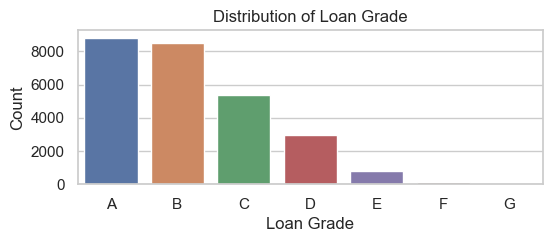

In [45]:
# 6. Countplot for Loan Grade
plt.figure(figsize=(6, 2))
sns.countplot(data=df, x='loan_grade', order=sorted(df['loan_grade'].unique()))
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Distribution of Loan Grade')
plt.show()

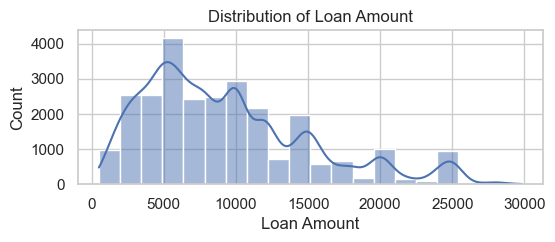

In [46]:
# 7. Histogram for Loan Amount
plt.figure(figsize=(6,2))
sns.histplot(data=df, x='loan_amnt', bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.show()

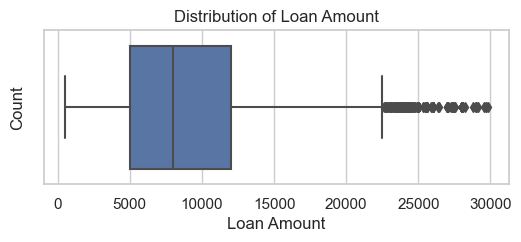

In [47]:
# 7. Histogram for Loan Amount
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='loan_amnt')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.show()

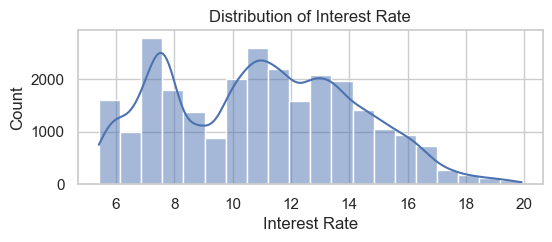

In [48]:
# 8. Histogram for Interest Rate
plt.figure(figsize=(6,2))
sns.histplot(data=df, x='loan_int_rate', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate')
plt.show()

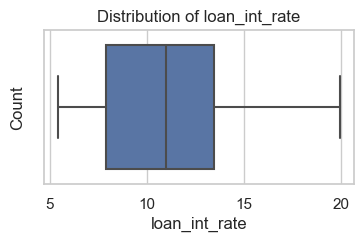

In [49]:
# 8. Box Plot for Interest Rate
plt.figure(figsize=(4, 2))
sns.boxplot(data=df, x='loan_int_rate')
plt.xlabel('loan_int_rate')
plt.ylabel('Count')
plt.title('Distribution of loan_int_rate')
plt.show()

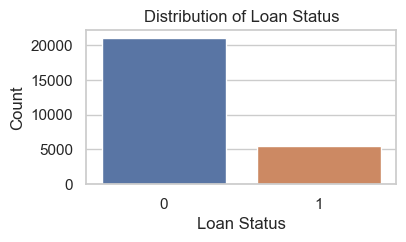

In [50]:
# 9. Countplot for Loan Status
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

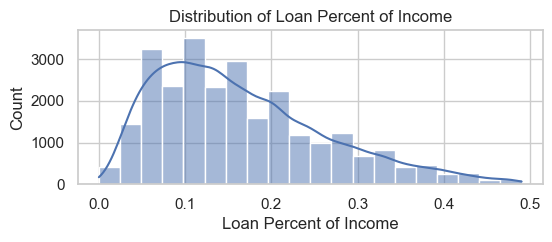

In [51]:
# 10. Histogram for Loan Percent of Income
plt.figure(figsize=(6,2))
sns.histplot(data=df, x='loan_percent_income', bins=20, kde=True)
plt.xlabel('Loan Percent of Income')
plt.ylabel('Count')
plt.title('Distribution of Loan Percent of Income')
plt.show()

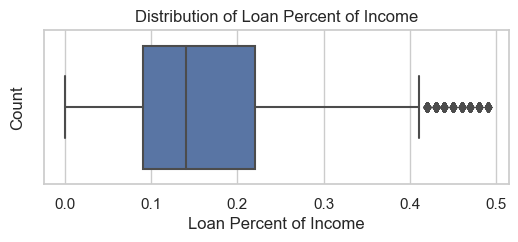

In [52]:
# 10. Box Plot for Loan Percent of Income
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='loan_percent_income')
plt.xlabel('Loan Percent of Income')
plt.ylabel('Count')
plt.title('Distribution of Loan Percent of Income')
plt.show()

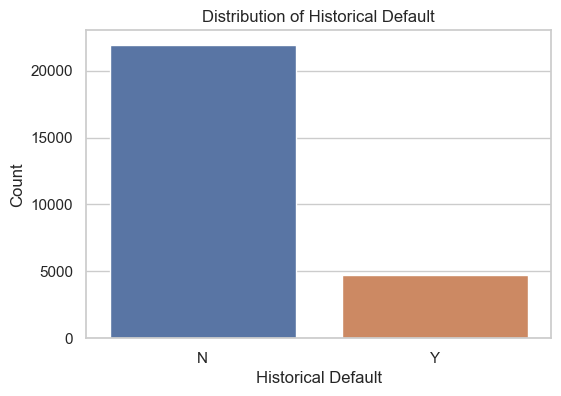

In [53]:
# 11. Countplot for Historical Default
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cb_person_default_on_file')
plt.xlabel('Historical Default')
plt.ylabel('Count')
plt.title('Distribution of Historical Default')
plt.show()

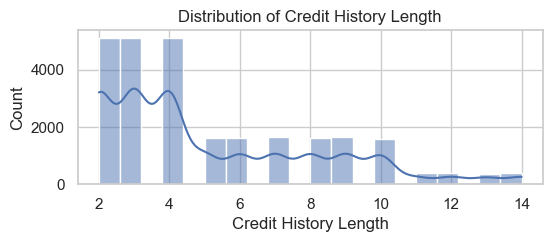

In [54]:
# 12. Histogram for Credit History Length
plt.figure(figsize=(6,2))
sns.histplot(data=df, x='cb_person_cred_hist_length', bins=20, kde=True)
plt.xlabel('Credit History Length')
plt.ylabel('Count')
plt.title('Distribution of Credit History Length')
plt.show()

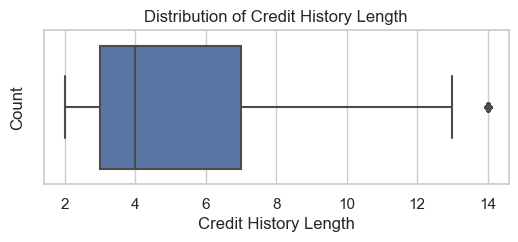

In [55]:
# 12. Histogram for Credit History Length
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='cb_person_cred_hist_length')
plt.xlabel('Credit History Length')
plt.ylabel('Count')
plt.title('Distribution of Credit History Length')
plt.show()

## Bivarient Plot

In [56]:
## CREATING A FUNCTION TO CALCULATE UPPER WHISKER  AND LOWER WHISKER RANGE 
def iqr(column): 
    q3=df[column].quantile(0.75)
    q1=df[column].quantile(0.25)
    iqr=q3-q1
    upper_boundary=q3+1.5*iqr
    lower_boundary=q1-1.5*iqr 
    return upper_boundary,lower_boundary 


##FUNCTION FOR UNIVARIATE ANALYSIS OF NUMERICAL COLUMNS
def num_stat(column):
    if column=="loan_status":
        print("The count of customers who defaulted is : ",df[column].sum())
        print("\n")
        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        sns.countplot(data=df,y=column)
        plt.subplot(1,2,2)
        df[column].value_counts().plot.pie(autopct="%0.0f")
    else:
        print(f"The minimum value  of column {column}  :",df[column].min())
        print(f"The maximum value of column {column}  :",df[column].max())
        print(f"The average value  of column {column}  :",df[column].mean())
        print(f"The median value is of column {column}  :",df[column].median())
        print(f"The standard deviation of column {column}  :",df[column].std())
        print("=============================")
    
    plt.figure(figsize=(8,6))
    plt.subplot(2,1,1)
    sns.distplot(df[column])
    plt.subplot(2,1,2)
    sns.boxplot(data=df,x=column)  

    
#FUNCTION FOR UNIVARIATE ANALYSIS  OF CATEGORICAL COLUMNS    
def cat_stat(column):
    print(f"For the {column} \n ",df[column].value_counts())
    print("\n")
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.countplot(data=df,y=column)
    plt.subplot(1,2,2) 
    df[column].value_counts().plot.pie(autopct="%0.0f") 
    plt.tight_layout() 


In [57]:
#CREATING A DICTIONARY FOR UPPER AND LOWER BOUNDARY OF NUMERICAL FEATURES
#HERE UPPER AND LOWER MEANS UPPER WHISKER AND LOWER WHISKER CALCULATED USING IQR
di_boundary={}
for i in numerical_df:
    if i=="loan_status":
        pass
    else: 
        upper,lower=iqr(i)##CALLING iqr() function here
        di_boundary[i]=[upper,lower]
print("Upper and lower boundaries of columns : ",di_boundary) 
print("\n")


##creating a dictionary with counts of outliers in each column
di_outliers={}
for feature in numerical_df:
    if feature=="loan_status":
        pass
    else:
        counts= df[(df[feature]>di_boundary[feature][0])|(df[feature]<di_boundary[feature][1])][feature].count()
        di_outliers[feature]=counts 
print("=========================================")
print("Number of outliers : ",di_outliers)

Upper and lower boundaries of columns :  {'person_age': [38.0, 14.0], 'person_income': [138280.0, -19800.0], 'person_emp_length': [14.5, -5.5], 'loan_amnt': [22500.0, -5500.0], 'loan_int_rate': [21.825000000000003, -0.45500000000000007], 'loan_percent_income': [0.41500000000000004, -0.10500000000000001], 'cb_person_cred_hist_length': [13.0, -3.0]}


Number of outliers :  {'person_age': 869, 'person_income': 1230, 'person_emp_length': 546, 'loan_amnt': 1123, 'loan_int_rate': 0, 'loan_percent_income': 506, 'cb_person_cred_hist_length': 408}


The minimum value  of column person_age  : 20
The maximum value of column person_age  : 50
The average value  of column person_age  : 26.902268629807693
The median value is of column person_age  : 26.0
The standard deviation of column person_age  : 4.907780067025739


C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\2036824737.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


The minimum value  of column person_income  : 4080
The maximum value of column person_income  : 1200000
The average value  of column person_income  : 65263.38998647837
The median value is of column person_income  : 55200.0
The standard deviation of column person_income  : 44937.88539176403


C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\2036824737.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


The minimum value  of column person_emp_length  : 0.0
The maximum value of column person_emp_length  : 19.0
The average value  of column person_emp_length  : 4.669283353365385
The median value is of column person_emp_length  : 4.0
The standard deviation of column person_emp_length  : 3.7962564364830835


C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\2036824737.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


The minimum value  of column loan_amnt  : 500
The maximum value of column loan_amnt  : 29800
The average value  of column loan_amnt  : 9311.871807391826
The median value is of column loan_amnt  : 8000.0
The standard deviation of column loan_amnt  : 5826.285191609032


C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\2036824737.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


The minimum value  of column loan_int_rate  : 5.42
The maximum value of column loan_int_rate  : 19.91
The average value  of column loan_int_rate  : 10.987915414663462
The median value is of column loan_int_rate  : 10.99
The standard deviation of column loan_int_rate  : 3.181285671909099


C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\2036824737.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


The count of customers who defaulted is :  5533




C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\2036824737.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


The minimum value  of column loan_percent_income  : 0.0
The maximum value of column loan_percent_income  : 0.49
The average value  of column loan_percent_income  : 0.16470177283653847
The median value is of column loan_percent_income  : 0.14
The standard deviation of column loan_percent_income  : 0.09863917104169427


C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\2036824737.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


The minimum value  of column cb_person_cred_hist_length  : 2
The maximum value of column cb_person_cred_hist_length  : 14
The average value  of column cb_person_cred_hist_length  : 5.194223257211538
The median value is of column cb_person_cred_hist_length  : 4.0
The standard deviation of column cb_person_cred_hist_length  : 3.0591869722135936


C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\2036824737.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


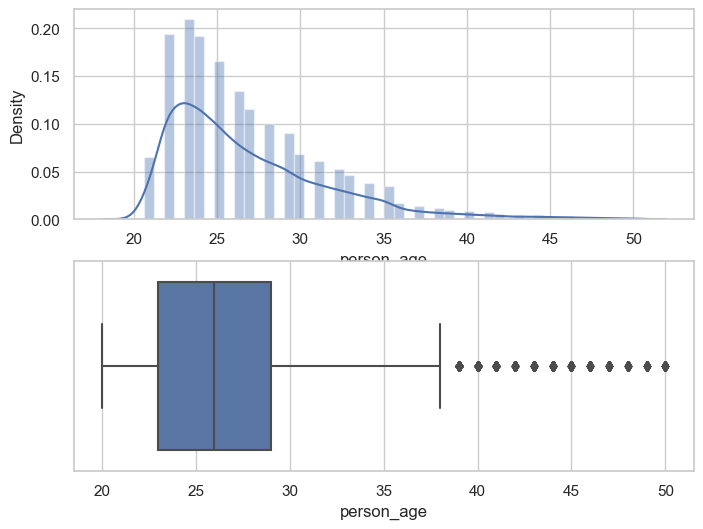

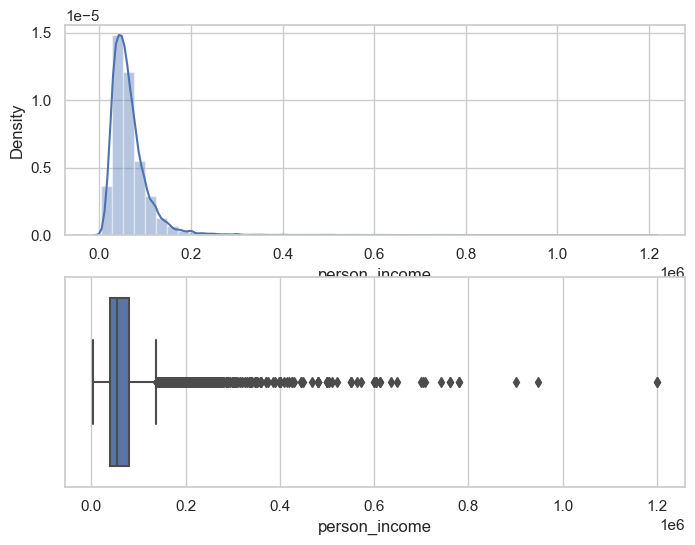

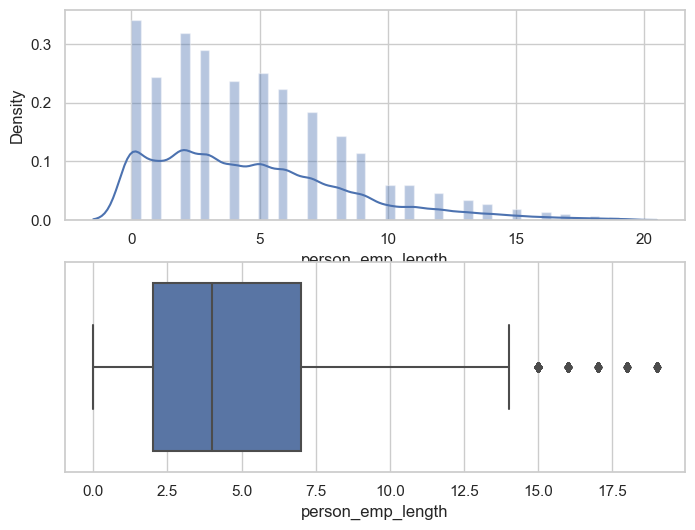

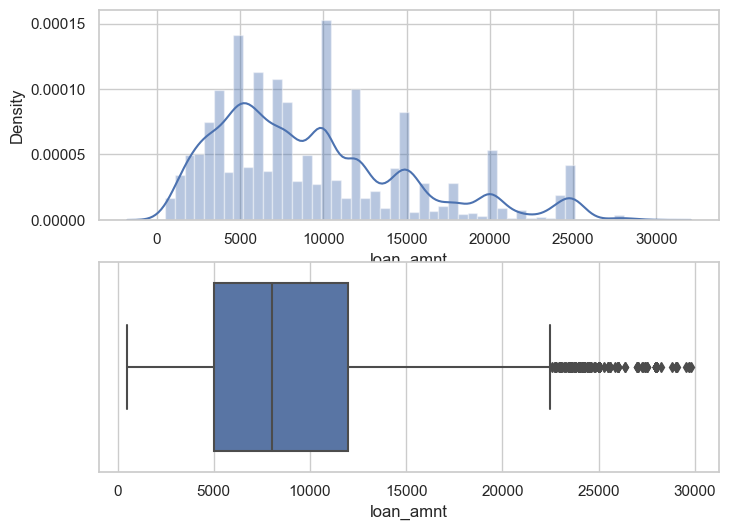

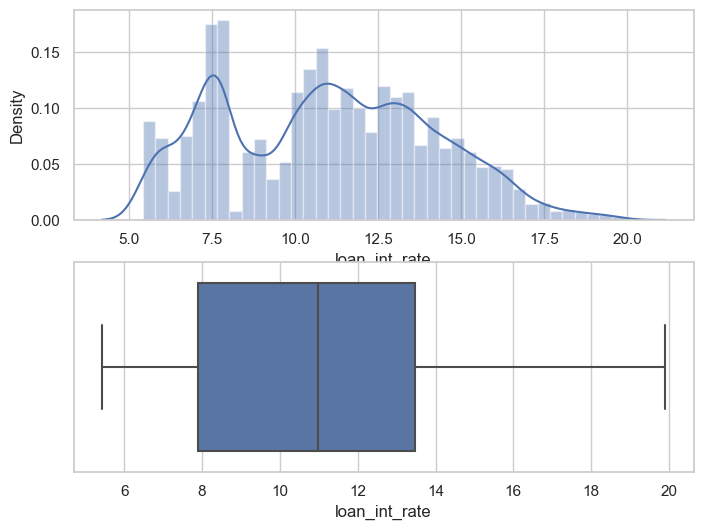

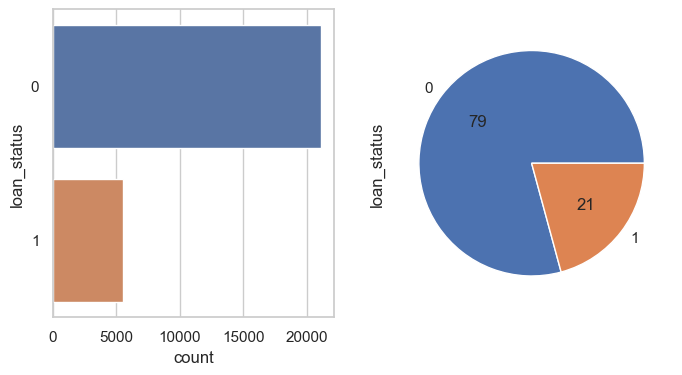

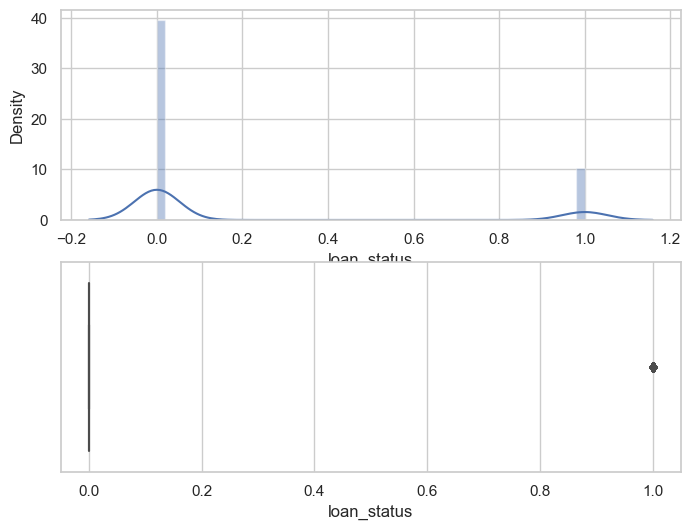

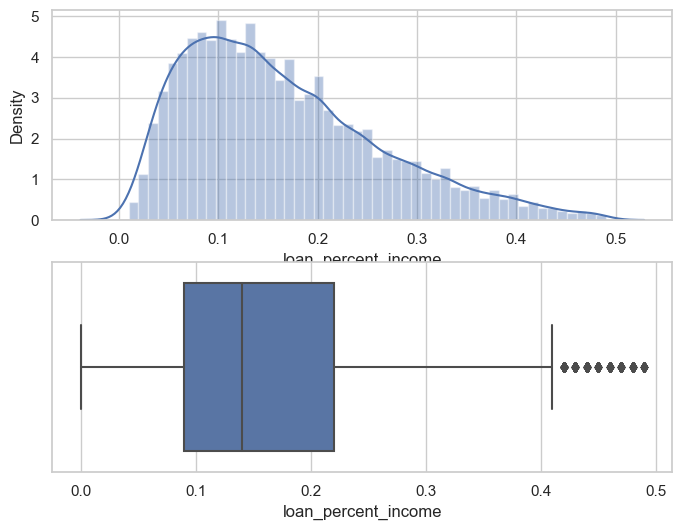

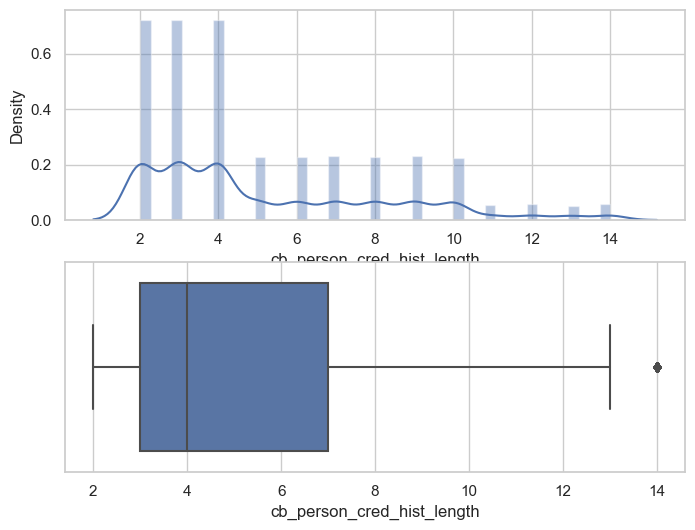

In [58]:
for i in numerical_df:
    num_stat(i)

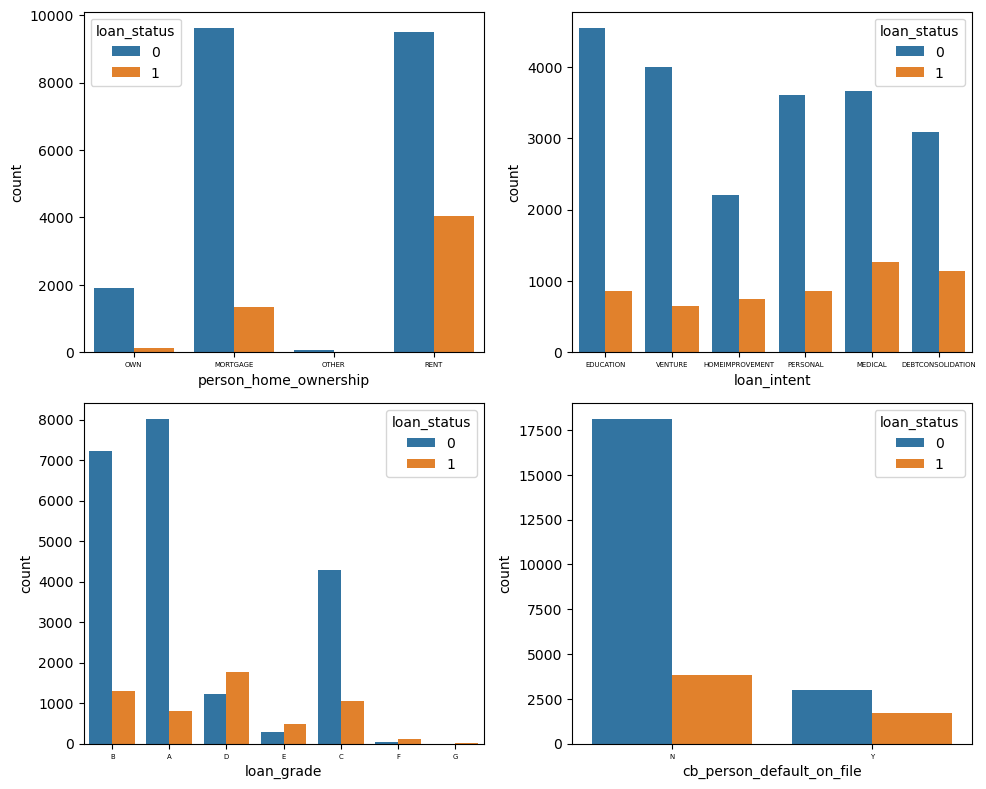

In [48]:
discrete_df = df.select_dtypes(include=['object'])
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
n=1
for i in discrete_df:
    plt.subplot(2,2,n)
    plt.xticks(fontsize=5)
    sns.countplot(data=df,hue="loan_status",x=i)
    n=n+1 
plt.tight_layout()

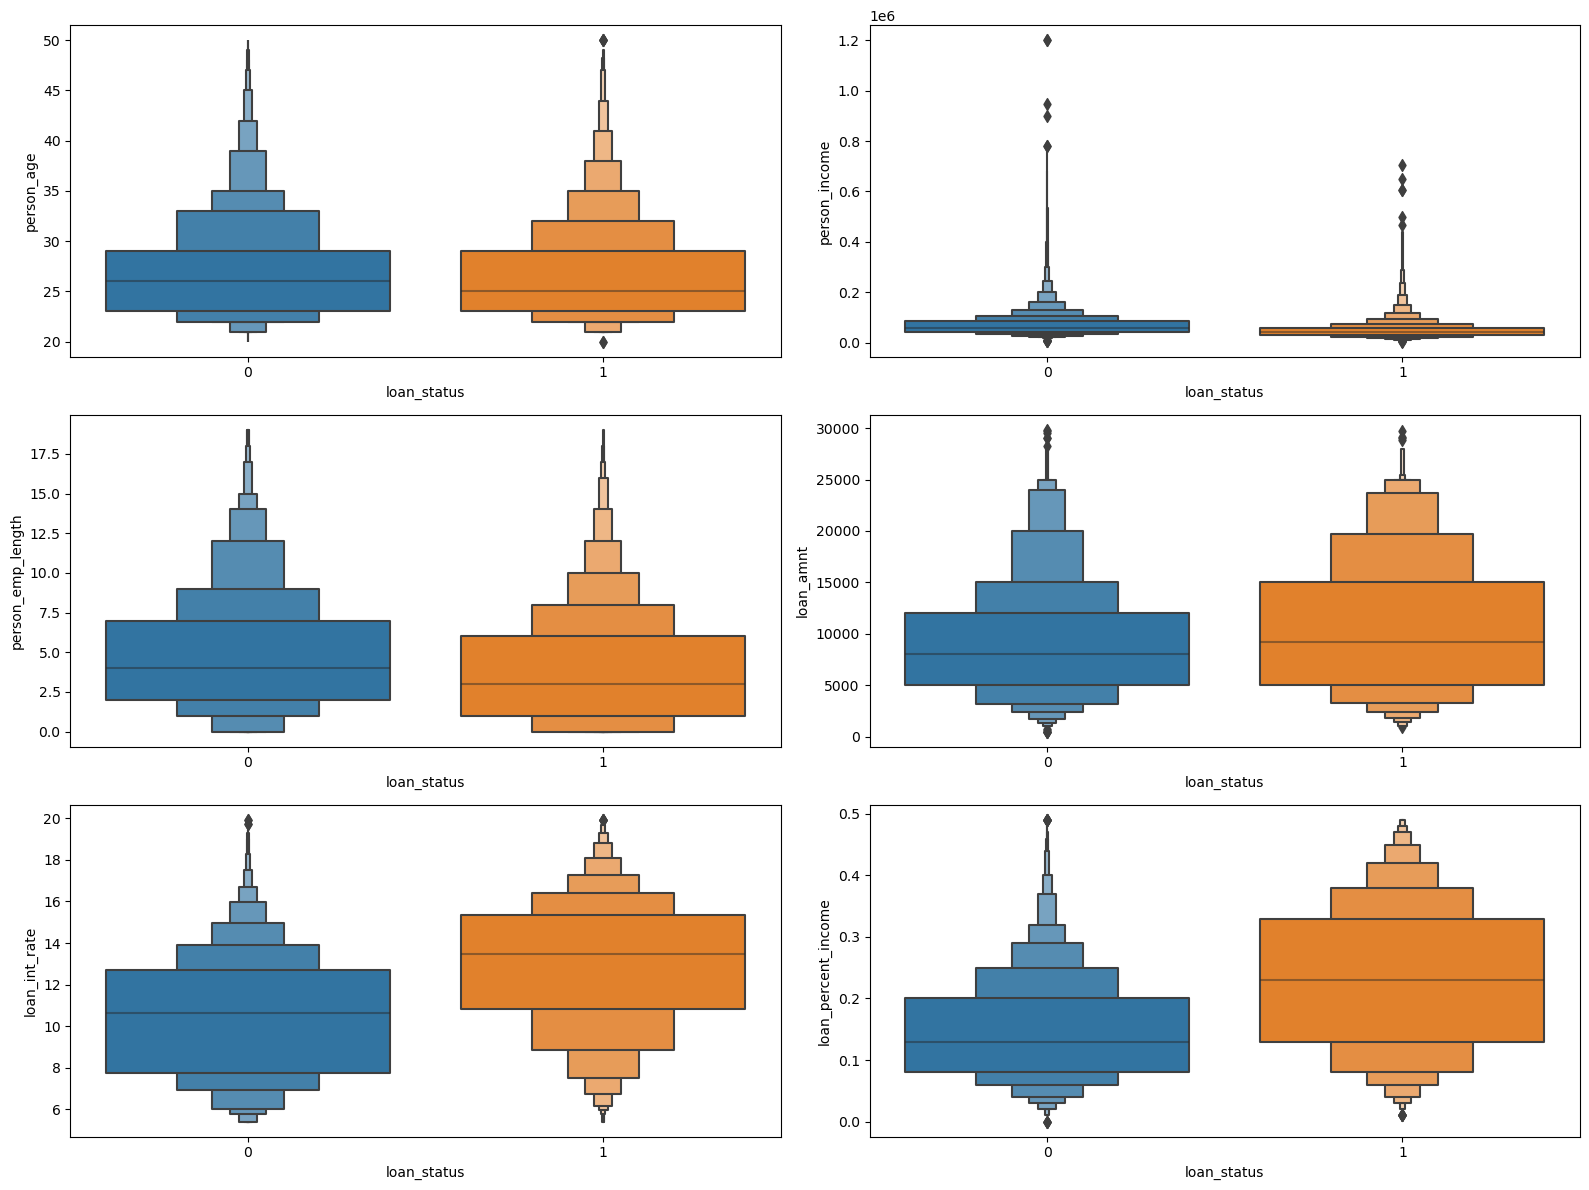

In [47]:
plt.figure(figsize=(16,12))
n=1
for i in numerical_df:
    if i=="loan_status" or i=="cb_person_cred_hist_length":
        pass
    else:
        plt.subplot(3,2,n)
        sns.boxenplot(data=df,x="loan_status",y=i)
        n=n+1 

plt.tight_layout() 

<Axes: xlabel='count', ylabel='cb_person_cred_hist_length'>

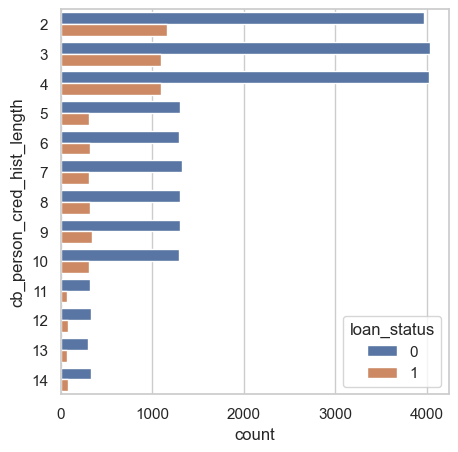

In [62]:
#calculating credit history vs loan_status
plt.figure(figsize=(5,5))
sns.countplot(data=df,y="cb_person_cred_hist_length",hue="loan_status")

In [35]:
 #Correlation Matrix
correlation_matrix = df.corr()


C:\Users\Admin\AppData\Local\Temp\ipykernel_11936\2103188086.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


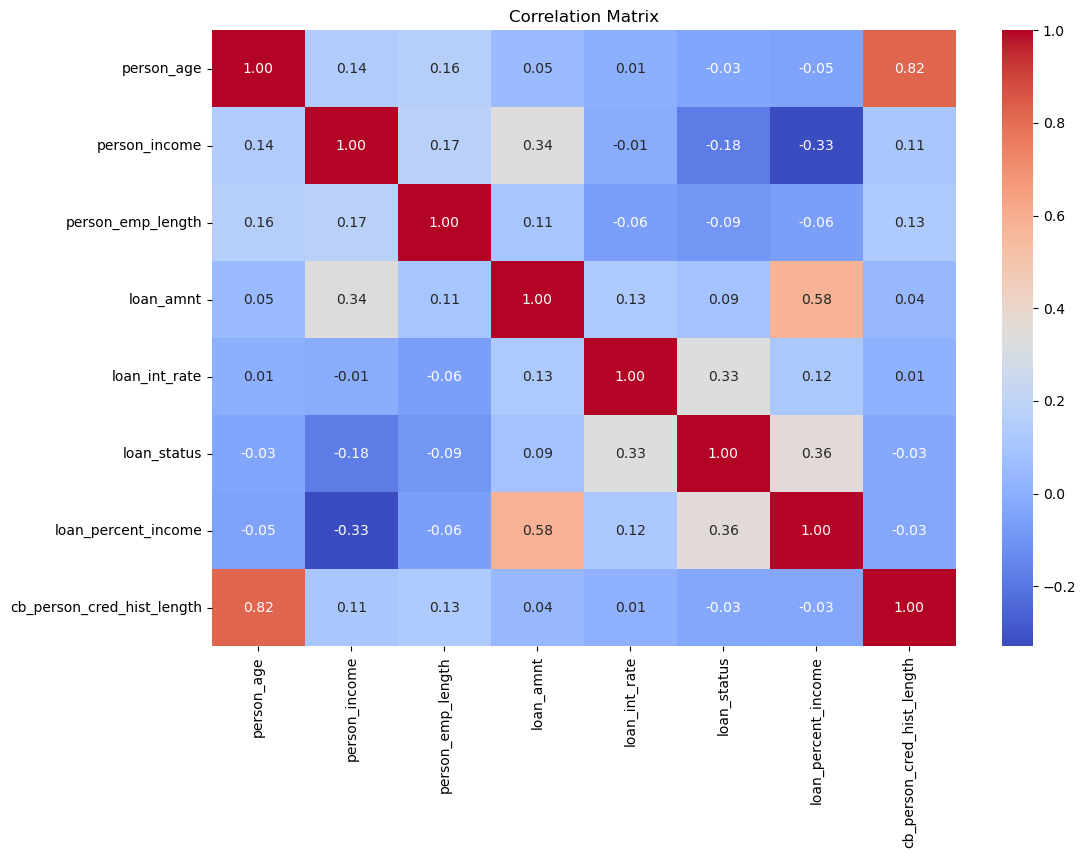

In [36]:
# Display a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()]

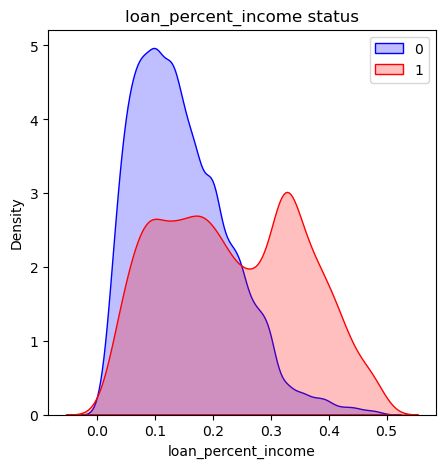

In [40]:

fig, axs = plt.subplots(figsize=(5,5)) 
axs = sns.kdeplot(df.loc[df["loan_status"] == 0, "loan_percent_income"], ax=axs,color = 'blue',fill=True)
axs = sns.kdeplot(df.loc[df["loan_status"] == 1, "loan_percent_income"],
                ax =axs, color="red", fill= True)
axs.legend([0,1],loc='upper right')
axs.set_ylabel('Density')
axs.set_xlabel('loan_percent_income')
axs.set_title('loan_percent_income status')
plt.show()



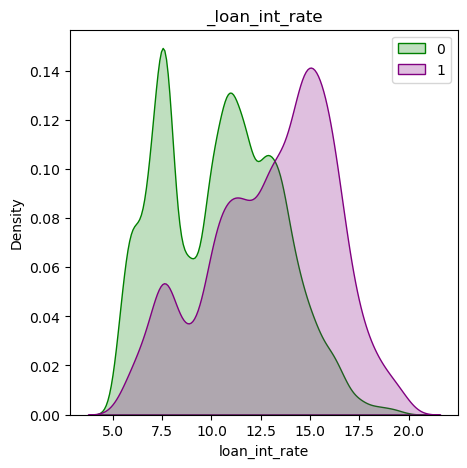

In [49]:
fig, axs = plt.subplots(figsize=(5,5)) 
axs = sns.kdeplot(df.loc[df["loan_status"] == 0, "loan_int_rate"], ax=axs,color = 'green',fill=True)
axs = sns.kdeplot(df.loc[df["loan_status"] == 1, "loan_int_rate"],
                ax =axs, color="purple", fill= True)
axs.legend([0,1],loc='upper right')
axs.set_ylabel('Density')
axs.set_xlabel('loan_int_rate')
axs.set_title('_loan_int_rate')
plt.show()
